<a href="https://colab.research.google.com/github/SeungPang11/Fake-News-Detection-with-Maching-Learning-Updated-Jan-24-/blob/main/Fake_News_Detection_(Updated_Jan_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fake News Detection (Updated Jan 2024)**
* **Objective**: Using FakeNewsNet datasets, improve performance to achieve <br>
more efficient and reliable predictive models for detecting fradulant information. <br>

* **Dataset**: [FakeNewsNet](https://github.com/KaiDMML/FakeNewsNet)<br>
  -Fake and real news from two news platforms, **Gossip Cop** and **Politifact**
<br> -**Attributes** include: id, news_url, title, and tweet_ids

 -Gossip Cop fake news - 5323 rows, 4 columns <br>
 -Gossip Cop real news - 16817 rows, 4 columns

 -Politifact fake news - 432 rows, 4 columns <br>
 -Politifact real news - 624 rows, 4 columns

 -Total fake news - 5755 <br>
 -Total real news - 17441


* **Problem**: imbalanced dataset; the total # real news **three times more** than the total # fake news <br>

*  **Process**: <br>
  -Exploratory Data Analysis (EDA) <br>
  -Feature Engineering <br>
  -Text Pre-processing <br>
  -Model Performance BEFORE Imbalanced Data Handling <br>
  -Model Performance AFTER SMOTE <br>
  -Model Performance AFTER Oversampling + Undersampling <br>

*  **Models**: <br>

In [ ]:
# Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Loading GossipCop and Politifact Dataframes

In [ ]:
#GossipCop Fake News and Real News
gossip_fn = pd.read_csv("/content/drive/MyDrive/gossipcop_fake.csv")
gossip_tn = pd.read_csv("/content/drive/MyDrive/gossipcop_real.csv")

In [ ]:
gossip_fn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [ ]:
gossip_tn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [ ]:
gossip_fn.shape, gossip_tn.shape

(5323, 4)

In [ ]:
#Load Politifact Fake and Real News
politi_fn = pd.read_csv("/content/drive/MyDrive/politifact_fake.csv")
politi_tn = pd.read_csv("/content/drive/MyDrive/politifact_real.csv")

In [ ]:
politi_fn.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [ ]:
politi_tn.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [ ]:
politi_fn.shape, politi_tn.shape

(432, 4)

### Data Cleaning & Manipulation

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Text cleaning - to lowercase, remove URLs, special characters, punctuations, stopwords, and emojis
stop_words = stopwords.words()

def cleaning(text):
    # converting to lowercase
    text = text.lower()

    # removing URL links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # removing special characters, punctuations
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # removing the emojies https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

dt = gossip_tn['title'].apply(cleaning)

In [ ]:
#Combine GossipCop and Politifact FAKE news
# id, news_url, title, tweet_ids
fakenews = np.concatenate((politi_fn, gossip_fn))
fakenews.shape

(5755, 4)

In [ ]:
#Combine GossipCop and Politifact REAL news
realnews = np.concatenate((politi_tn, gossip_tn))
realnews.shape

(17441, 4)

In [ ]:
# Add Flag - 1 indicate FAKE news
#fakenews.shape (5755, 2)
ones = np.ones(fakenews.shape[0])
fakenews = np.column_stack((fakenews, ones))
fakenews = pd.DataFrame(fakenews, columns = ['id','news_url','title','tweet','flag'])

In [ ]:
fakenews.head(5)

,id,news_url,title,tweet,flag
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,1.00
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,1.00
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,1.00
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,1.00
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,1.00


In [ ]:
# Add Flag - 0 indicate REAL news
columns = ['id','news_url','title','tweet','flag']
zeros = np.zeros(realnews.shape[0])
realnews = np.column_stack((realnews, zeros))
realnews = pd.DataFrame(realnews, columns = columns)

In [ ]:
realnews.head(5)

,id,news_url,title,tweet,flag
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,0.00
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,0.00
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,0.00
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,0.00
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,0.00


In [ ]:
fakenews = fakenews.fillna(" ")
realnews = realnews.fillna(" ")

In [ ]:
#Check Shape
fakenews.shape, realnews.shape

(5755, 5)

In [ ]:
# Combine fake and real news datasets -> allnews
allnews = np.concatenate((fakenews, realnews))
allnews.shape

In [ ]:
# Assign columns
allnews = pd.DataFrame(allnews, columns = columns)

In [ ]:
# Shuffle data
from sklearn.utils import shuffle
allnews = shuffle(allnews)

In [ ]:
allnews.head(5)

,id,news_url,title,tweet,flag
10502,gossipcop-921031,https://people.com/music/kendall-jenner-rap-li...,See Kendall Jenner Rap About Exploring Her Unm...,974396839402328065\t974398044912283648\t974398...,0.00
4473,gossipcop-8386188284,www.thewrap.com/big-little-lies-season-2-adds-...,'Big Little Lies' Season 2 Returns 3 More Cast...,981256308371238913\t981496837059342336,1.00
6091,politifact751,http://elections.nytimes.com/2008/president/de...,First Presidential Debate,708170780283052032\t708170783529435136\t708170...,0.00
7636,gossipcop-943735,https://www.hollywoodreporter.com/features/tif...,"Tiffany Haddish, Hollywood’s New Comedy Queen,...",1006907994624360450\t1006923588308537344\t1006...,0.00
6759,gossipcop-857428,https://grazia.com.au/articles/ariana-grande-e...,Ariana Grande pens powerful essay after terror...,868177425557073921\t868179003148042241\t868179...,0.00


In [ ]:
allnews.dtypes

id          object
news_url    object
title       object
tweet       object
flag        object
dtype: object

### Word Count Distribution

In [ ]:
#The average count of words of tweet title
#On average, 11 words
allnews['word_count'] = allnews['title'].str.split().apply(len)
allnews['word_count'].mean()

11.161191584755992

In [ ]:
len(allnews['word_count'])

23196

## Feature Engineering
1) **Tweet Count** <br>
* "**tweet count**" feature shows the number of times a news article has been tweeted/ retweeted <br><br>

2) **Sentiment Analysis** <br>

* Analyze the emotional tone of the news <br>

* Create features with the following information - polarity, sensitivity, positivity, negativity, neutrality <br><br>

3) **TD-IDF** (Term Frequency-Inverse Document Frequency) <br>
* Transform texts into numeric representation to make data usable for ML models <br>
* **TF (Term Frequency)**:
(# times term t appears in a document) / (Total # of terms in the document) <br>
* **IDF (Inverse Document Frequency)**:
Log_10 (Total # of documents) / (# of documents with term t in it)

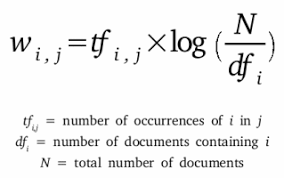



### 1) Tweet Count - # of times a news article has been tweeted/ retweeted.

In [ ]:
#1) "tweet count" column
allnews["tweet count"] = allnews["tweet"].str.split('\t').str.len()

In [ ]:
allnews.head(5)

,id,news_url,title,tweet,flag,word_count,tweet count
10502,gossipcop-921031,https://people.com/music/kendall-jenner-rap-li...,See Kendall Jenner Rap About Exploring Her Unm...,974396839402328065\t974398044912283648\t974398...,0.00,15,79
4473,gossipcop-8386188284,www.thewrap.com/big-little-lies-season-2-adds-...,'Big Little Lies' Season 2 Returns 3 More Cast...,981256308371238913\t981496837059342336,1.00,14,2
6091,politifact751,http://elections.nytimes.com/2008/president/de...,First Presidential Debate,708170780283052032\t708170783529435136\t708170...,0.00,3,1307
7636,gossipcop-943735,https://www.hollywoodreporter.com/features/tif...,"Tiffany Haddish, Hollywood’s New Comedy Queen,...",1006907994624360450\t1006923588308537344\t1006...,0.00,12,27
6759,gossipcop-857428,https://grazia.com.au/articles/ariana-grande-e...,Ariana Grande pens powerful essay after terror...,868177425557073921\t868179003148042241\t868179...,0.00,12,62


### 2) Sentiment Analysis <br>
* Analyzing sentiment of news tweets using TextBlob. <br>
* **Polarity** is a float that lies between [-1,1], **-1** indicating **negative** sentiment and **1** indicating **positive** sentiment.<br>
* **Subjectivity** is a float which lies in the range of [0,1]. Subjectivity refers to **personal opinion**, emotion, or judgment.

In [ ]:
# Sentiment Analysis
# Reference: https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
pd.options.display.float_format = '{:,.2f}'.format
from textblob import TextBlob

In [ ]:
# Add Polarity and Sensitivity features

def get_polarity(text):
  polarity = TextBlob(text)
  score = polarity.sentiment[0]
  return score

def get_sensitivity(text):
  sensitivity = TextBlob(text)
  return sensitivity.sentiment[1]


allnews["polarity"] = allnews['title'].apply(lambda x: get_polarity(x))
allnews["sensitivity"] = allnews['title'].apply(lambda x: get_sensitivity(x))

In [ ]:
# Take the features we need
allnews = allnews[["title", "flag", "word_count", "tweet count", "polarity", "sensitivity"]]

In [ ]:
allnews.dtypes

title           object
flag            object
word_count       int64
tweet count      int64
polarity       float64
sensitivity    float64
dtype: object

### 3) TF-IDF for Text Feature

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# TF-IDF Vectorizer
# Transform texts (news titles) into a meaningful representation of numbers while removing stopwords
#tf_idf = TfidfVectorizer(analyzer='word')

tf_idf = TfidfVectorizer(analyzer='word', stop_words='english', strip_accents = "ascii")
X = tf_idf.fit_transform(allnews['title'])
y = allnews['flag'].astype('int')

#Transform to arrays
np.asarray(X)
np.asarray(y)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# features = tf_idf.get_feature_names()
# news_matrix_df = pd.DataFrame(allnews, columns=tf_idf.get_feature_names(), index=allnews['title'])
# news_matrix_df.head(10)

In [ ]:
X.shape

(23196, 17920)

In [ ]:
# Transform non-text features to a sparse matrix
from scipy import sparse
import scipy as sp
from scipy.sparse import csr_matrix

Non_Text_Features = sparse.csr_matrix(allnews.loc[:,'word_count':'sensitivity'])

In [ ]:
Non_Text_Features.shape

(23196, 4)

In [ ]:
# Combine Text Feature X and Non_Text_Features
combined_df = sp.sparse.hstack([X, Non_Text_Features])
combined_df.shape

(23196, 17924)

In [ ]:
# Combined Sparse Matrix Data
combined_df

<23196x17924 sparse matrix of type '<class 'numpy.float64'>'
	with 249920 stored elements in Compressed Sparse Row format>

In [ ]:
# Transform to Dense
# combined_df = combined_df.todense()

In [ ]:
# 70:30 Train and Test Split
Xtr, Xts, ytr, yts = train_test_split(combined_df, y, random_state = 0, test_size = 0.3)

In [ ]:
Xtr

<16237x17924 sparse matrix of type '<class 'numpy.float64'>'
	with 174817 stored elements in Compressed Sparse Row format>

In [ ]:
# Scale Data
from sklearn.preprocessing import MaxAbsScaler #fixed import
scaler = MaxAbsScaler()
Xtr = scaler.fit_transform(Xtr)
Xts = scaler.transform(Xts)

## Model Performance **BEFORE** Imbalanced Data Handling
* Gaussian Naive Bayes
* Bernoulli Naive Bayes
* Logistic Regression
* XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

#1) Gaussian Naive Bayes
Xtr = Xtr.toarray()
Xts = Xts.toarray()

GNB = GaussianNB()
classifier = GNB.fit(Xtr,ytr)
yhat = classifier.predict(Xts)

In [ ]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

# Plot non-normalized confusion matrix
titles_options = [
    ("GNB Confusion matrix, without normalization", None),
    ("GNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# GNB Performance - BEFORE SMOTE
# print("Cross Val: ", cross_val_score(GNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

In [ ]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# BNB Performance - BEFORE SMOTE
#print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

In [ ]:
# 3) Logistic Regression - BEFORE SMOTE
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

#Logit Performance
# print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8446615893088087
Precision:  0.7788632326820604
Recall:  0.51316559391457
F1:  0.618694885361552
ROC-AUC:  0.7328685112429993


In [ ]:
# 4) XGBoost - BEFORE SMOTE
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

#XGBoost Performance
#print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8739761459979882
Precision:  0.8027656477438136
Recall:  0.6454066705675834
F1:  0.7155368147907882
ROC-AUC:  0.7968938114742677


In [ ]:
# 5) SVM - BEFORE SMOTE
from sklearn import svm
svm = svm.SVC()
svm.fit(Xtr, ytr)
yhat= svm.predict(Xts)

#Print socres
# print("Cross Val: ", cross_val_score(svm, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8407817215117115
Precision:  0.835005574136009
Recall:  0.4382679929783499
F1:  0.5748273215656178
AUC:  0.7050387583939368


## Analysis - Before Imbalanced Data Handling
MOST models (Bernoulli Naive Bayes, Logistic Regression, XGBoost, SVM) <br>
• **HIGH** Accuracy and Precision, but **LOW** Recall <br>
• **HIGH** Accuracy, but **LOW** ROC-AUC <br>
• Good at capturing REAL news, but **poorly detects FAKE news** <br>

• Imbalanced dataset (REAL news more than 3 times greater than FAKE news) <br>
-> Model tilted towards predicting the majority class

## Apply SMOTE (Synthetic Minority Over Sampling)
• Over sample minority class (FAKE news)

In [ ]:
#https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xtr, ytr)

In [ ]:
from collections import Counter
ctr = Counter(y_res)
print(ctr)

Counter({0: 12191, 1: 12191})


In [ ]:
# np.asarray(X_res)
# np.asarray(y_res)
Xtr, Xts, ytr, yts = train_test_split(X_res, y_res, random_state = 0, test_size = 0.3)

### Gaussian Naive Bayes - SMOTE

In [ ]:
#1) Gaussian Naive Bayes
GNB = GaussianNB()
classifier = GNB.fit(Xtr,ytr)
yhat = classifier.predict(Xts)

GNB Confusion matrix, without normalization
[[2382 1290]
 [ 168 3500]]
GNB Normalized confusion matrix
[[0.64869281 0.35130719]
 [0.04580153 0.95419847]]


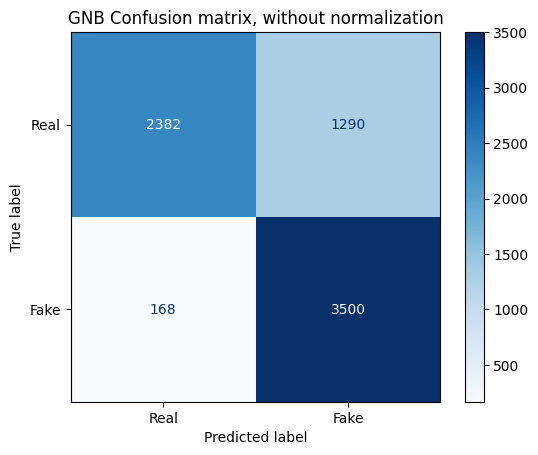

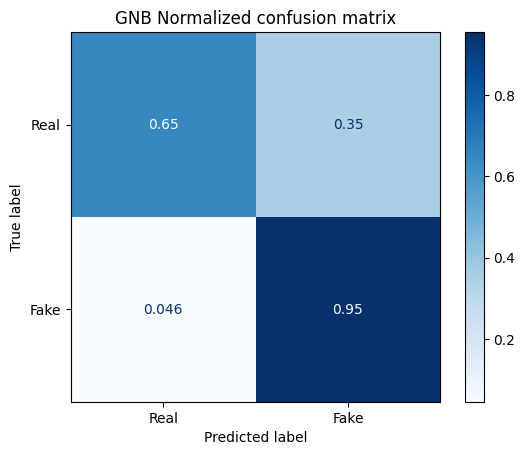

In [ ]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

# Plot non-normalized confusion matrix
titles_options = [
    ("GNB Confusion matrix, without normalization", None),
    ("GNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#1) Gaussian Naive Bayes - AFTER SMOTE
# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8013623978201635
Precision:  0.7306889352818372
Recall:  0.9541984732824428
F1:  0.8276188224166471
ROC-AUC:  0.8014456418699796


### Bernoulli Naive Bayes - SMOTE

BNB Confusion matrix, without normalization
[[2382 1290]
 [ 168 3500]]
BNB Normalized confusion matrix
[[0.64869281 0.35130719]
 [0.04580153 0.95419847]]


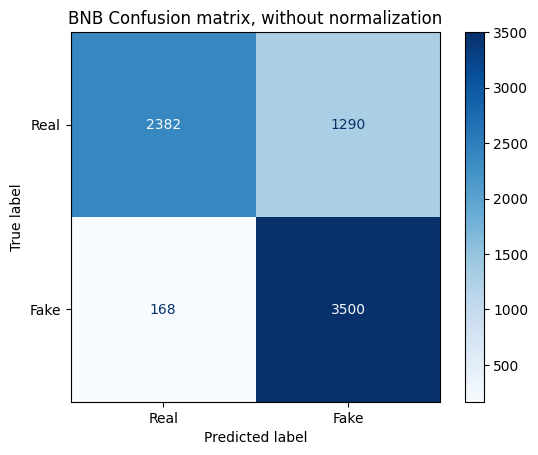

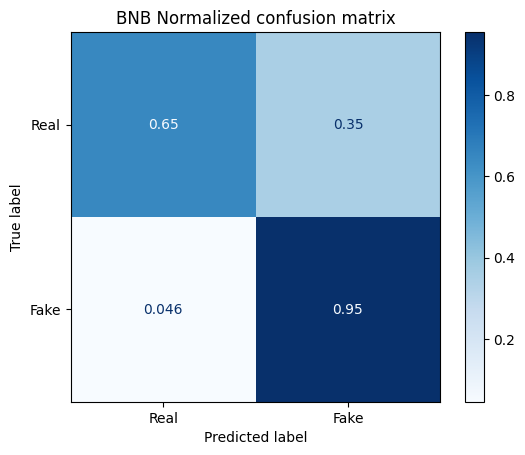

In [ ]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#BNB Performance - AFTER SMOTE
print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Cross Val :  [0.81982759 0.82456897 0.83362069 0.82974138 0.82931034 0.83706897
 0.83958603 0.83139284 0.83699871 0.83354894]
Accuracy:  0.8799727520435967
Precision:  0.8607300025886616
Recall:  0.9064885496183206
F1:  0.8830168636303279
ROC-AUC:  0.8799871941991385


### Logistic Regression - SMOTE

In [ ]:
#Logistic Regression - AFTER SMOTE
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8772385509227615
Precision:  0.8720086044635654
Recall:  0.8848567530695771
F1:  0.878385698808234
ROC-AUC:  0.8772228970827337


### XGBoost - SMOTE

In [ ]:
#XGBoost - AFTER SMOTE
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8961038961038961
Precision:  0.9250804799531753
Recall:  0.8624829467939973
F1:  0.8926856820107314
ROC-AUC:  0.8961729802463138


In [ ]:
# SVM - AFTER SMOTE
from sklearn import svm
svm = svm.SVC()
svm.fit(Xtr, ytr)
yhat= svm.predict(Xts)

#Print socres
# print("Cross Val: ", cross_val_score(svm, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.9092276144907724
Precision:  0.9456489456489456
Recall:  0.8687585266030013
F1:  0.9055745164960182
AUC:  0.9093107701508157


## Apply Undersampling & SMOTE (Synthetic Minority Over Sampling)
• Undersample majority class (REAL news) <br>
• Over sample minority class (FAKE news)

In [ ]:
# Get Fake News
FN_df = allnews.loc[allnews['flag'] == 1]
FN_df.shape

(5755, 6)

In [ ]:
# Get Real News
RN_df = allnews.loc[allnews['flag'] == 0]
RN_df.shape

(17441, 6)

In [ ]:
# Undersample Real News
# Split real news 3:2 (17441 rows total -> 11510 (2/3))
RN_df = RN_df.iloc[:11510,:]

In [ ]:
RN_df.columns

Index(['title', 'flag', 'word_count', 'tweet count', 'polarity',
       'sensitivity'],
      dtype='object')

In [ ]:
news_df = np.concatenate((FN_df, RN_df))

In [ ]:
# Assign columns
news_df = pd.DataFrame(allnews, columns = ['title', 'flag', 'word_count', 'tweet count', 'polarity',
       'sensitivity'])
news_df.head(5)

,title,flag,word_count,tweet count,polarity,sensitivity
10502,See Kendall Jenner Rap About Exploring Her Unm...,0.00,15,79,0.00,0.00
4473,'Big Little Lies' Season 2 Returns 3 More Cast...,1.00,14,2,0.10,0.37
6091,First Presidential Debate,0.00,3,1307,0.25,0.33
7636,"Tiffany Haddish, Hollywood’s New Comedy Queen,...",0.00,12,27,-0.23,0.68
6759,Ariana Grande pens powerful essay after terror...,0.00,12,62,0.30,1.00


In [ ]:
# TF-IDF Vectorizer
# Transform texts (news titles) into a meaningful representation of numbers while removing stopwords
tf_idf = TfidfVectorizer(analyzer='word', stop_words='english', strip_accents = "ascii")
X = tf_idf.fit_transform(news_df['title'])
y = allnews['flag'].astype('int')

#Transform to arrays
np.asarray(X)
np.asarray(y)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Apply SMOTE on Minority Class
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
#Count # Classes - We can observe equal number of data in both classes
ctr = Counter(y_res)
print(ctr)

Counter({0: 17441, 1: 17441})


In [ ]:
#To Array and Train-Test Split
np.asarray(X_res)
np.asarray(y_res)
Xtr, Xts, ytr, yts = train_test_split(X_res, y_res, random_state = 0, test_size = 0.3)

In [ ]:
# Scale Data
from sklearn.preprocessing import MaxAbsScaler #fixed import
scaler = MaxAbsScaler()
Xtr = scaler.fit_transform(Xtr)
Xts = scaler.transform(Xts)

In [ ]:
Xtr = Xtr.toarray()
Xts = Xts.toarray()

### Gaussian Naive Bayes - OVERSAMPLING & UNDERSAMPLING

In [ ]:
#1) Gaussian Naive Bayes
GNB = GaussianNB()
classifier = GNB.fit(Xtr,ytr)
yhat = GNB.predict(Xts)

GNB Confusion matrix, without normalization
[[3057 2079]
 [ 174 5155]]
GNB Normalized confusion matrix
[[0.59521028 0.40478972]
 [0.03265153 0.96734847]]


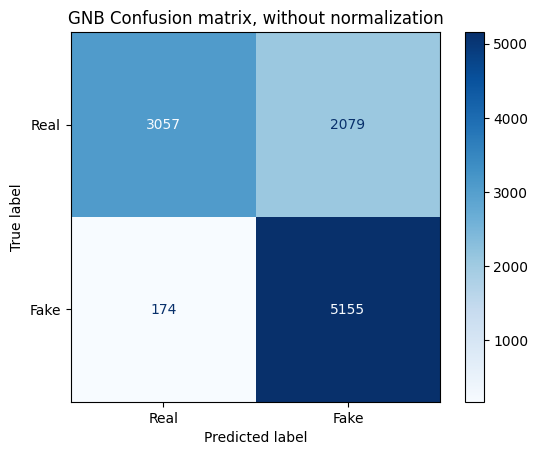

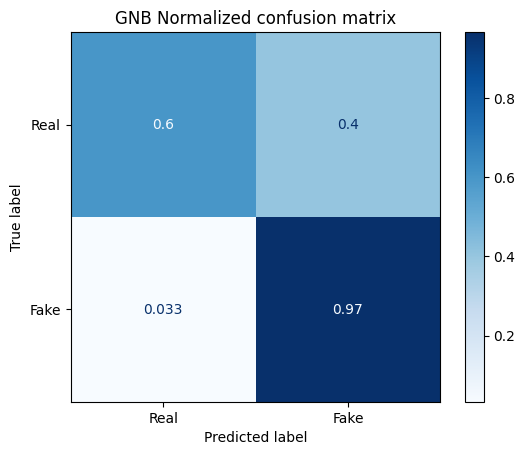

In [ ]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

# Plot non-normalized confusion matrix
titles_options = [
    ("GNB Confusion matrix, without normalization", None),
    ("GNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#1) Gaussian Naive Bayes
#GNB F1 score improved from 0.41 to 0.86

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.7847109412326804
Precision:  0.7126071329831352
Recall:  0.9673484706323888
F1:  0.8206638541749582
ROC-AUC:  0.7812793755031103


### Bernoulli Naive Bayes - OVERSAMPLING & UNDERSAMPLING

BNB Confusion matrix, without normalization
[[3057 2079]
 [ 174 5155]]
BNB Normalized confusion matrix
[[0.59521028 0.40478972]
 [0.03265153 0.96734847]]


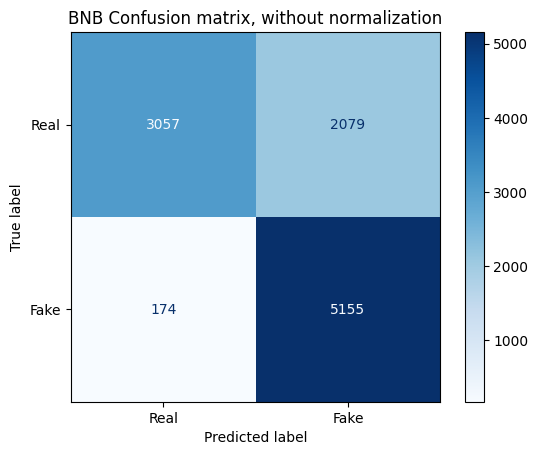

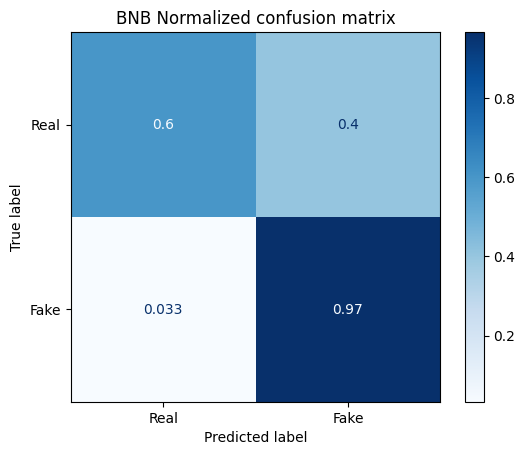

In [ ]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#2) Bernoulli Naive Bayes

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8642140468227425
Precision:  0.8539855072463768
Recall:  0.8845937324075812
F1:  0.8690201861922757
ROC-AUC:  0.8638311341165632


### Logistic Regression - OVERSAMPLING & UNDERSAMPLING

In [ ]:
#Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8701385570950788
Precision:  0.8575347476225311
Recall:  0.8899221863731258
F1:  0.8734283319362951
ROC-AUC:  0.869999584333599


### XGBoost - OVERSAMPLING & UNDERSAMPLING

In [ ]:
#XGBoost
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8380315336837076
Precision:  0.8894943330427202
Recall:  0.7745302713987474
F1:  0.8280409861012479
ROC-AUC:  0.8384776068310134


### SVM - OVERSAMPLING & UNDERSAMPLING <br>
Computationally intensive. Will update soon.


In [ ]:
# SVM Oversampling + Undersampling
# from sklearn import svm
# svm = svm.SVC()
# svm.fit(Xtr, ytr)
# yhat= svm.predict(Xts)

# #Print socres
# # print("Cross Val: ", cross_val_score(svm, X, y, cv=3))
# print("Accuracy: ",metrics.accuracy_score(yts, yhat))
# print("Precision: ", metrics.precision_score(yts, yhat))
# print("Recall: ", metrics.recall_score(yts, yhat))
# print("F1: ", metrics.f1_score(yts, yhat))
# print("AUC: ", metrics.roc_auc_score(yts, yhat))

## Final Result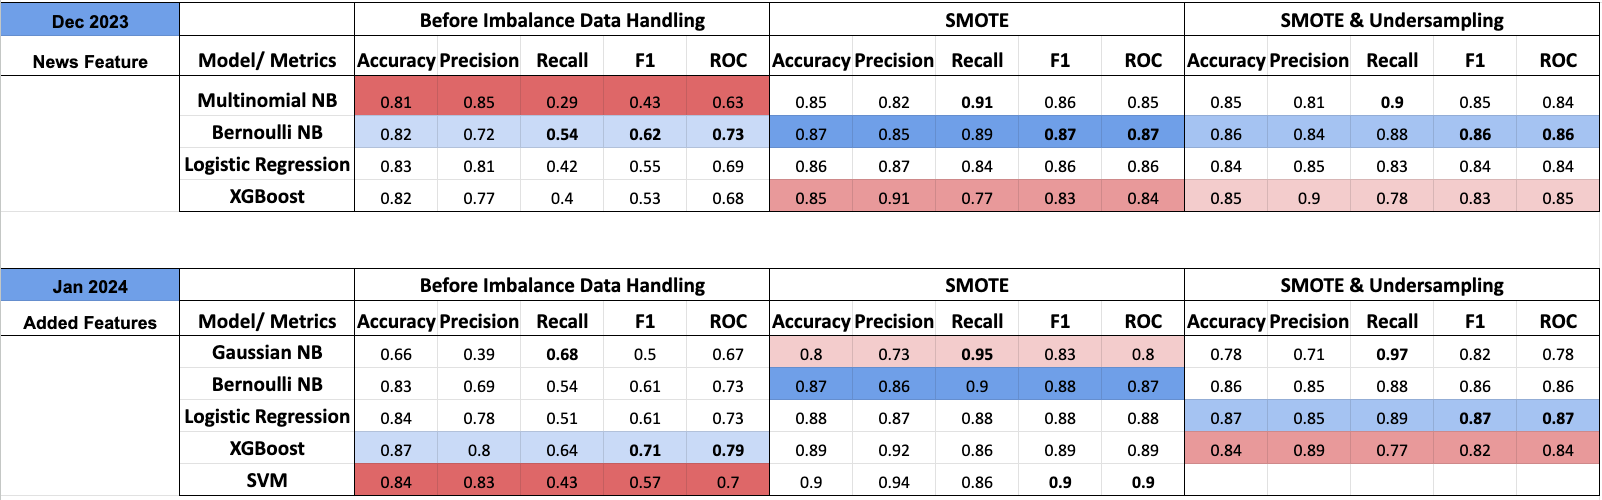